# Simple linear regression - exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression


## Load the data

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data.head()


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


NameError: name 'x' is not defined

## Create the regression

### Declare the dependent and the independent variables

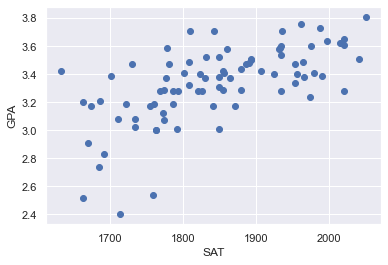

In [5]:
y = data['GPA']
x1 = data['SAT']

plt.figure()
plt.xlabel('SAT', fontweight=20)
plt.ylabel('GPA', fontweight=20)
plt.scatter(x1, y)
plt.show();

In [7]:
x1.shape

(84,)

In [8]:
# The logicstic regression in sklearn only works 
# with multi-dimensional arrays (ndarray in numpy)
# This is one way to reshape it.
x_matrix = x1.values.reshape(84,1)
x_matrix.shape

(84, 1)

In [9]:
y.shape

(84,)

In [10]:
y_matrix = y.values.reshape(84, 1)

### Explore the data

In [11]:
x = sm.add_constant(x1)

print(x.head())
print(x1.head())

   const   SAT
0    1.0  1714
1    1.0  1664
2    1.0  1760
3    1.0  1685
4    1.0  1693
0    1714
1    1664
2    1760
3    1685
4    1693
Name: SAT, dtype: int64


### Regression itself

In [13]:
reg = LinearRegression()


In [14]:
result = reg.fit(x_matrix,y_matrix)
print(type(result))
print(dir(result))

<class 'sklearn.linear_model._base.LinearRegression'>
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_residues', '_set_intercept', '_validate_data', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'normalize', 'predict', 'rank_', 'score', 'set_params', 'singular_']


### Plot the regression line on the initial scatter

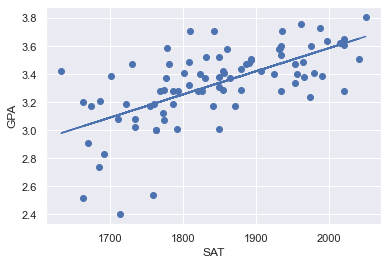

In [17]:
yhat = reg.predict(x_matrix)
plt.figure()

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.scatter(x1, y)

plt.plot(x1, yhat)

In [36]:
# Lets explore what the coefecients look like
print(reg.coef_)
print(reg.intercept_)

[[0.00165569]]
[0.2750403]


In [22]:
# the other option available is to use pandas DF directly with sklearn.
# But this approach can be used for multidimensional regressions
# with more than 1 feature.

# Scaling and Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(x_matrix)

StandardScaler()

In [27]:
x_scaled = scaler.transform(x_matrix)

In [28]:
type(x_scaled)

numpy.ndarray

In [30]:
x_scaled

array([[-1.26338288],
       [-1.74458431],
       [-0.82067757],
       [-1.54247971],
       [-1.46548748],
       [-1.68684014],
       [-0.78218146],
       [-0.78218146],
       [-0.51270866],
       [ 0.04548499],
       [-1.06127829],
       [-0.67631715],
       [-1.06127829],
       [-1.28263094],
       [-0.6955652 ],
       [ 0.25721362],
       [-0.86879772],
       [-1.64834403],
       [-0.03150724],
       [-0.57045283],
       [-0.81105355],
       [-1.18639066],
       [-1.75420834],
       [-1.52323165],
       [ 1.23886453],
       [-0.18549169],
       [-0.5608288 ],
       [-0.23361183],
       [ 1.68156984],
       [-0.4934606 ],
       [-0.73406132],
       [ 0.85390339],
       [-0.67631715],
       [ 0.09360513],
       [ 0.33420585],
       [ 0.03586096],
       [-0.35872421],
       [ 1.04638396],
       [-0.65706909],
       [-0.13737155],
       [ 0.18984542],
       [ 0.04548499],
       [ 1.1618723 ],
       [-1.37887123],
       [ 1.39284898],
       [ 0

In [33]:

x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df.describe()

,0
count,8.400000e+01
mean,-9.357594e-16
std,1.006006e+00
min,-2.033305e+00
25%,-7.051892e-01
50%,6.988878e-03
75%,8.539034e-01
max,1.970291e+00
